# TP3 : Décomposition QR, bataille navale et épidemiologie
### Physique Numérique (PHY-3500)
### Par: Simon Gauthier, Laurent Émond, Thomas Charland
### Présenté à: Xavier Roy-Pomerleau et Antoine Allard
### Remis le: 14 avril 2025

In [22]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math

## TP3.1 : Décomposition QR par méthode de Householder

### Mise en contexte

Il existe plusieurs méthode afin de résoudre des systèmes d'équations linéaires, dont plusieurs atteignent cette fin en utilisant la réduction en matrice triangulaire du système d'équation. La méthode de *Householder* est l'une d'entre elle, et elle est souvent utilisée en physique numérique puisqu'elle est plus stable numériquement que d'autres méthodes (*Gram-Schmidt*, par exemple) [1]. Le fonctionnement intrinsèque de cette méthode est méconnu, et est exploré au TP3.1 .

### (a) Démontrer que $Q_i$ sont orthogonales

Prouvons d'abord que les matrices $\mathbf{H}_{m,i}$ sont orthogonales. Ces dernières sont définies telles que:

$$
\mathbf{H}_{m,i} = \mathbf{I}_{m-i}-2\frac{\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{\mathbf{v}_{m,i}^T\mathbf{v}_{m,i}}
$$
où $\mathbf{v}_{m,i}$ est un vecteur unitaire. On sait donc que $\mathbf{v}_{m,i}^T\mathbf{v}_{m,i}=||\mathbf{v}_{m,i}||^2=1$.
Pour valider l'orthogonalité, il suffit de vérifier si $\mathbf{H}_{m,i}\mathbf{H}_{m,i}^T=\mathbf{I}_{m-i}$. 
On a donc:
$$
\begin{align*}
    \mathbf{H}_{m,i}\mathbf{H}_{m,i}^T &= (\mathbf{I}_{m-i}-2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)(\mathbf{I}_{m-i}-2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)^T\\
    &=(\mathbf{I}_{m-i}-2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)(\mathbf{I}^T_{m-i}-2(\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)^T)\\
    &= (\mathbf{I}_{m-i}-2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)(\mathbf{I}_{m-i}-2((\mathbf{v}^T_{m,i})^T(\mathbf{v}_{m,i})^T)\\
    &= (\mathbf{I}_{m-i}-2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)^2\\
    &=\mathbf{I}^2_{m-i}-4\mathbf{I}_{m-i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}+4\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}\\
    &=\mathbf{I}^2_{m-i}-4\mathbf{I}_{m-i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}+4\mathbf{v}_{m,i}(1)\mathbf{v}^T_{m,i}\\
    &= \mathbf{I}^2_{m-i}\\
    &=\mathbf{I}_{m-i}\\
    &CQFD
\end{align*}
$$

On a donc que la matrice est orthogonale. Sachant cela, vérifions que $\mathbf{Q}_i$ est aussi orthogonale. On veut donc vérifier si:
$$
\mathbf{Q}_i\mathbf{Q}^T_i=\mathbf{I}_i
$$
Pour cela, on trouve que:
$$
\mathbf{Q}^T_i=
\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}^T=
\begin{pmatrix}
\mathbf{I}^T_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}^T_{m,i}\\
\end{pmatrix} =
\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}=\mathbf{Q}_i
$$
On vérifie donc que:
$$
\mathbf{I}_m = \begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}^2=
\begin{pmatrix}
\mathbf{I}^2_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}^2_{m,i}\\
\end{pmatrix}=\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{I}_{m-i}\\
\end{pmatrix}=\mathbf{I}_{m}
$$
La matrice $\mathbf{Q}_i$ est donc orthogonale.


### (b) Démontrer équation 3.5 et que matrice $Q$ est orthogonale

Insérer calculs pour TP3.1.b

### (c) Implémenter householder_qr

In [23]:
#Code pour TP3.1.c

def householder_qr(A_matrix):
    m, n = A_matrix.shape
    Q_matrices = []
    Q_matrix = np.identity(m)
    R_matrix = A_matrix

    #itère sur le nombre de colonnes
    for i in range(n):
        if i == 0:
            x_vector = np.array([A_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)
            Q_i = H_mi_matrix

            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix  = Q_i @ A_matrix
        else:
            x_vector = np.array([R_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)

            Q_i_top_half = np.concatenate([np.identity(i), np.zeros((i, m-i))], axis=1)
            Q_i_bottom_half = np.concatenate([np.zeros((m-i, i)), H_mi_matrix], axis=1)
            Q_i = np.concatenate([Q_i_top_half, Q_i_bottom_half])
            
            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix = Q_i @ R_matrix
    
    return Q_matrices, Q_matrix, R_matrix

Insérer explications textuelles ici

### (d) Comparer avec numpy.linalg.qr

In [24]:
#Code pour TP3.1.d

test_Matrix = np.array([[0.39805139, 0.4602148,  0.77802764], [0.50348954, 0.31542224, 0.18787408], [0.55434532, 0.38180744, 0.36835822], [0.68027513, 0.39975617, 0.29883721]])
print("Voici la matrice test utilisée en entrée: \n", test_Matrix, "\n")

Q_matrices_homebrew, Q_matrix_hombrew, R_matrix_homebrew = householder_qr(test_Matrix)

Q_matrix_numpy, R_matrix_numpy = np.linalg.qr(test_Matrix)

print("Voici la matrice obtenue avec notre méthode householder_qr: \n", R_matrix_homebrew, "\n")
print("Voici la matrice obtenue avec la méthode numpy.linalg.qr \n", R_matrix_numpy, "\n")



Voici la matrice test utilisée en entrée: 
 [[0.39805139 0.4602148  0.77802764]
 [0.50348954 0.31542224 0.18787408]
 [0.55434532 0.38180744 0.36835822]
 [0.68027513 0.39975617 0.29883721]] 

Voici la matrice obtenue avec notre méthode householder_qr: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [ 7.31934693e-17  2.00549215e-01  5.50620262e-01]
 [ 1.48540853e-17 -2.85250714e-17 -7.01975668e-02]
 [-1.83319040e-17 -1.70883346e-18 -1.14236911e-17]] 

Voici la matrice obtenue avec la méthode numpy.linalg.qr 
 [[-1.08720725 -0.75937526 -0.74666242]
 [ 0.          0.20054922  0.55062026]
 [ 0.          0.         -0.07019757]] 



Plusieurs différences sont identifiées entre le résultat des deux méthodes:
- Les dimensions de la matrice obtenue avec householder_qr est 4x3, alors que celle avec numpy est de 3x3 - on dit alors qu'elle est réduite. La rangée supplémentaire de notre matrice est sensiblement remplie de zéros, ce qui fait en sorte qu'elle n'affecte en rien le résultat obtenu. Puisque l'énoncé du TP disait que la matrice R devait être de la même forme $m$ x $n$ que la matrice A, nous décidons de garder la forme de la matrice R ainsi.
- Les valeurs obtenues sont sensiblement les mêmes. Avec la méthode numpy, nous obtenons de "vrais" zéros, alors que notre méthode householder_qr nous retourne des chiffres très proches de zéros (de l'ordre de e-17 ou plus petit), mais qui ne sont pas vraiment zéro. Il serait possible d'arrondir nos chiffres à la 8e décimale comme numpy, ce qui nous permettrait d'avoir des vrais zéros et de se débarasser de la notation scientifique. Toutefois, nous ne croyons pas que cette différence causera problème plus tard lors de la résolution de systèmes d'équations linéaires.

### (e) Illustrer la triangularisation de la matrice du numéro précédent

In [25]:
#Code pour TP3.1.e

print("Voici la matrice test utilisée en entrée: \n", test_Matrix, "\n")

new_Matrix = test_Matrix
for i in range(len(Q_matrices_homebrew)):
    print(f"MATRICE Q_{i+1}", "\n")
    #Si la matrice est orthogonale, son produit avec sa transposée donne la mtrice identité
    product = Q_matrices_homebrew[i] @ Q_matrices_homebrew[i].T
    is_orthognal = np.allclose(product, np.identity(Q_matrices_homebrew[i].shape[0]))
    print(f"La matrice Q_{i+1} est orthogonale: ", is_orthognal)
    new_Matrix = Q_matrices_homebrew[i] @ new_Matrix
    print(f"En multipliant avec la matrice Q_{i+1}, nous obtenons la matrice suivante: \n", new_Matrix)

    is_triangular_superior = np.allclose(new_Matrix, np.triu(new_Matrix))
    print("La matrice obtenue après multiplication est triangulaire supérieure: ", is_triangular_superior, "\n")

Voici la matrice test utilisée en entrée: 
 [[0.39805139 0.4602148  0.77802764]
 [0.50348954 0.31542224 0.18787408]
 [0.55434532 0.38180744 0.36835822]
 [0.68027513 0.39975617 0.29883721]] 

MATRICE Q_1 

La matrice Q_1 est orthogonale:  True
En multipliant avec la matrice Q_1, nous obtenons la matrice suivante: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [-2.64334515e-17 -9.80079995e-02 -3.28982360e-01]
 [-9.88550250e-18 -7.33819933e-02 -2.00704146e-01]
 [-7.15369553e-17 -1.58837977e-01 -3.99498215e-01]]
La matrice obtenue après multiplication est triangulaire supérieure:  False 

MATRICE Q_2 

La matrice Q_2 est orthogonale:  True
En multipliant avec la matrice Q_2, nous obtenons la matrice suivante: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [ 7.31934693e-17  2.00549215e-01  5.50620262e-01]
 [ 1.46016701e-17  7.96203845e-18  1.54922502e-02]
 [-1.85335854e-17  2.74445943e-17  6.84666968e-02]]
La matrice obtenue après multiplication est triangulaire supérieure:  F

On voit qu'à chaque multiplication d'une matrice Q, nous traitons une colonne de plus en transformant les élements en bas de la diagonale à zéro, jusqu'à triangulariser la totalité des colonnes de notre matrice et ainsi obtenir la matrice R. Chacune des matrices Q est orthogonale, et la matrice R est bel et bien triangulaire supérieure. 

# TP3.2 : bataille navale

### Mise en contexte

La décomposition QR présentée au TP3.1 permet de résoudre des systèmes d'équations linéaires de manière numérique. Au TP3.2, nous utiliserons cette méthode afin d'aider notre riche amie à gagner son jeu de bataille navale grandeur nature. Espérons qu'après l'aide que nous lui apportons, elle nous nommera sur son testament! 

### (a) modifier le code de la décomposition QR

In [26]:
#insérer code pour question TP3.2.a

def householder_qr(A_matrix, reduite=False):
    m, n = A_matrix.shape
    Q_matrices = []
    Q_matrix = np.identity(m)
    R_matrix = A_matrix

    #itère sur le nombre de colonnes
    for i in range(n):
        if i == 0:
            x_vector = np.array([A_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)
            Q_i = H_mi_matrix

            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix  = Q_i @ A_matrix
        else:
            x_vector = np.array([R_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)

            Q_i_top_half = np.concatenate([np.identity(i), np.zeros((i, m-i))], axis=1)
            Q_i_bottom_half = np.concatenate([np.zeros((m-i, i)), H_mi_matrix], axis=1)
            Q_i = np.concatenate([Q_i_top_half, Q_i_bottom_half])
            
            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix = Q_i @ R_matrix

    if reduite:
        R_matrix = R_matrix[:-(m-n)]
        Q_matrix = Q_matrix[:-(m-n)].T
    
    return Q_matrices, Q_matrix, R_matrix

Insérer explications textuelles ici

### (b) résoudre approximativement l'équation 3.9

In [27]:
#insérer code pour question TP3.2.b
def readCsvFile(file_path):
    x_values = []
    y_values = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            x_values.append(float(row[0]))
            y_values.append(float(row[1]))
    
    return x_values, y_values

def solve_by_retrosubstitution(x_vector, y_vector):
    #build original X matrix
    X_matrix = np.array([[1, x_vector[0][0], x_vector[0][0]**2]])
    for i in range(len(x_vector)-1):
        new_row = np.array([[1, x_vector[i+1][0], x_vector[i+1][0]**2]])
        X_matrix = np.concatenate([X_matrix, new_row], axis = 0)

    all_reduced_Q_matrices, reduced_Q_matrix, reduced_R_matrix = householder_qr(X_matrix, reduite=True)
    right_side_matrix = reduced_Q_matrix.T @ y_vector

    alpha_2 = right_side_matrix[2][0] / reduced_R_matrix[2][2]
    alpha_1 = (right_side_matrix[1][0] - alpha_2 * reduced_R_matrix[1][2]) / reduced_R_matrix[1][1]
    alpha_0 = (right_side_matrix[0][0] - alpha_2 * reduced_R_matrix[0][2] - alpha_1 * reduced_R_matrix[0][1]) / reduced_R_matrix[0][0]
    alpha_vector = np.array([[alpha_0, alpha_1, alpha_2]]).T

    return alpha_vector

x_values, y_values = readCsvFile("data/bataille_navale_equipe009.csv")
x_vector, y_vector = np.array([x_values]).T, np.array([y_values]).T
alpha_vector = solve_by_retrosubstitution(x_vector, y_vector)

print("Valeur de alpha_0 : ", alpha_vector[0][0])
print("Valeur de alpha_1 : ", alpha_vector[1][0])
print("Valeur de alpha_2 : ", alpha_vector[2][0])

Valeur de alpha_0 :  -69.53355811024178
Valeur de alpha_1 :  2.255946212787103
Valeur de alpha_2 :  -0.0008446435707730703


Insérer explications textuelles ici

### (c) Tracez les données et solutions estimées

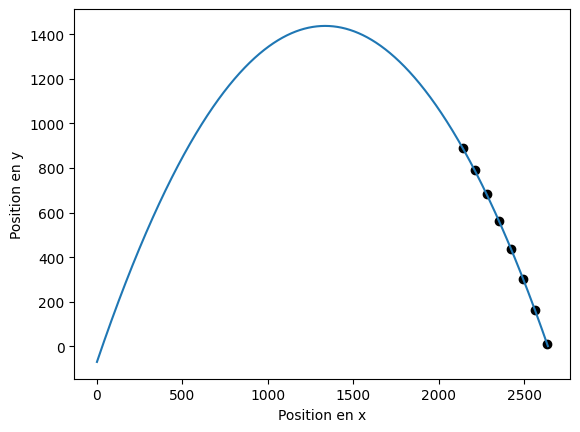

In [28]:
#insérer code pour question TP3.2.c

x_range = [element for element in range(3000)]
y_trajectory = []
increment = 0
for x in x_range:
    y_position = alpha_vector[0][0] + alpha_vector[1][0]*x + alpha_vector[2][0]*(x**2)
    if y_position < 0 and increment > 100:
        break
    else:
        y_trajectory.append(y_position)
        increment += 1
x_range = x_range[:increment]

plt.scatter(x_values, y_values, color="black")
plt.plot(x_range, y_trajectory)
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.show()

Insérer explications textuelles ici

### (d) Comparaison de méthodes de résolution

In [ ]:
#insérer code ici

def fonction_x(alpha_vec, x_value):
    return alpha_vec[0][0] + alpha_vec[1][0] * x_value + alpha_vec[2][0] * (x_value**2)

def bissection_quadratique(f_x, x_start, x_end, tolerance = 1e-4):
    #résout une quadratique de forme y(x) = alpha_0 + alpha_1 * x + alpha_2 * (x**2) par bissection

    delta_x = x_end - x_start
    while delta_x > tolerance:
        y_value_start, y_value_end = f_x(alpha_vector, x_start), f_x(alpha_vector, x_end)
        if math.copysign(1, y_value_start) != math.copysign(1, y_value_end): #checks that both are opposite signs
            x_middle = x_start + (x_end - x_start) / 2
            y_value_middle = f_x(alpha_vector, x_middle)
            if math.copysign(1, y_value_start) == math.copysign(1, y_value_middle):
                x_start = x_middle
            else:
                x_end = x_middle
            delta_x = x_end - x_start
        else:
            raise ValueError("y_value_start and y_value_end are the same sign!")
    
    return x_middle

position_dimpact_projectile = bissection_quadratique(fonction_x, 100, 3000)
print(f"Selon la méthode de bissection, le projectile va frapper le sol à {position_dimpact_projectile}m de notre bateau")



Le projectile va frapper le sol à 2639.6989554166794m de notre bateau


Pour la résolution analytique, 

# TP3.3 : Épidemiologie SIR sur réseau

### Mise en contexte

Le modèle épidemiologique SIR simule la propagation d'un agent pathogène contagieux au sein d’une population [1]. Ce modèle est basé sur deux composantes majeures: nombre de contacts de chaque individu ($P(n)$) et la contagiosité de la malade ($R_{\infty}). Ce TP3.3 se penche sur la résolution du modèle SIR, ce qui nous permettra d'éviter de tomber malade la prochaine fois qu'il y a une pandémie... #not

### (a) Solutions analytiques

Ça va être long! On va sauter certaines étapes dans cette explication sinon on y sera toute la nuit. Mais allons-y!

Avec k=5 nous simplifions u pour obtenir:
\begin{align*}
    u = \frac{1}{(1+4T(1-u))^2} &= \frac{1}{(1+4T-4Tu)^2}
\end{align*}

On fait le changement de variable x = 1+4T-4Tu:
\begin{align*}
    u = \frac{1}{x^2} &\Rightarrow x = 1 + 4T - \frac{4T}{x^2}
\end{align*}

En multipliant par x^2, cela nous permet d'avoir une expression cubique plus simple pour x:
\begin{align*}
    x^3 - (1 + 4t)x^2 - 4T &= 0
\end{align*}

Nous utilisons la méthode de Cardan afin de résoudre pour x. En premier, nous faisons un autre changement de variable, soit $x = y + \frac{1+4T}{3}$, ce qui nous permet d'obtenir une formule cubique sans terme quadratique:

\begin{align*}
    (y + \frac{1+4T}{3})^3 - (1+4T)(y+\frac{1+4T}{3})^2 - 4T = 0 &\Rightarrow y^3 - \frac{(1+4T)^2}{3}y + \frac{2(1+4T)^2}{27} + 4T = 0
\end{align*}

L'équation a maintenant forme $y^3 + py + q = 0$, ce qui nous permet de substituer encore une fois avec $y = u+v$ en sachant que $u^3 + v^3 = -q$ et que $uv = -\frac{p}{3}$. On a alors un système à deux équations, deux inconnues; c'est la beauté de la méthode de Cardan:

\begin{align*}
    u^3 + v^3 &= - \frac{2(1+4T)^2}{27} - 4T\\
    uv &= \frac{(1+4T)^2}{9}\\
\end{align*}

Si l'on résout ce système, on obtient:

\begin{align*}
    u &= \sqrt[3]{-\frac{(\frac{2(1+4T)^3}{27} + 4T)}{2} + \sqrt{\left(\frac{(\frac{2(1+4T)^3}{27} + 4T)}{2}\right)^2 + \left(\frac{-\frac{(1+4T)^2}{3}}{3}\right)^3}}\\
    v &= \sqrt[3]{-\frac{(\frac{2(1+4T)^3}{27} + 4T)}{2} - \sqrt{\left(\frac{(\frac{2(1+4T)^3}{27} + 4T)}{2}\right)^2 + \left(\frac{-\frac{(1+4T)^2}{3}}{3}\right)^3}}\\
\end{align*}

Nous retrouvons y avec $y = u + v$, puis nous retrouvons x avec $x = y + (1+4T)/3$.

### (b) Démontrer la solution qui correspond à $u$

Démonstration ici :)

### (c) Tracez $R_{\infty}$ en fonction de $T$

In [30]:
#insérer code pour TP3.3.c ici

Insérer explications textuelles ici

### (d) Résoudre équation 3.14 numérique, méthode de relaxation et méthode Newton-Raphson

In [31]:
#insérer code pour TP3.3.d, méthode de relaxation

In [32]:
#insérer code pour TP3.3.d, méthode de Newton-Raphson

Insérer explications textuelles ici

# Références

[1] TP3, Antoine Allard, PHY-3500 Physique Numérique